### Classification with TensorFlow

In [134]:
!pip install opendatasets


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [136]:
#od.download('https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight')

In [137]:
data=pd.read_csv('data/dataset_classification.csv')
data.head(5)

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [138]:
data.loc[data['Sex']=='Male','Sex']=1
data.loc[data['Sex']=='Female','Sex']=0

In [139]:
data.head(5)

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [140]:
X=data.drop(['Sex'],axis=1)
y=data['Sex']

In [141]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x_scaled=scaler.fit_transform(X)
X=pd.DataFrame(x_scaled,columns=['Height','Weight'])

In [142]:
X.head(5)

,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108


In [143]:
y=y.astype('int')

In [144]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int32

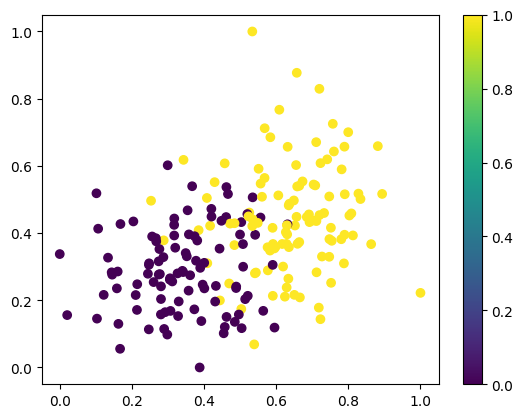

In [145]:
plt.scatter(X['Height'],X['Weight'],c=y)
plt.colorbar()
plt.show()

In [146]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [147]:
X_train.shape, X_test.shape

((164, 2), (41, 2))

In [148]:
data.shape

(205, 3)

<h5>Model Building</h5>

In [149]:
# create a model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    # tf.keras.layers.Dense(2,activation='softmax')
])

#compile model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.1),
              metrics=['accuracy'])
# model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               optimizer=tf.keras.optimizers.Adam(lr=0.1),
#               metrics=['accuracy'])

# train model
history=model.fit(X_train, y_train, epochs=20)

Epoch 1/20
6/6 [==============================] - 1s 3ms/step - loss: 0.7032 - accuracy: 0.4390
Epoch 2/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.5122
Epoch 3/20
6/6 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.5244
Epoch 4/20
6/6 [==============================] - 0s 2ms/step - loss: 0.6625 - accuracy: 0.5244
Epoch 5/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6521 - accuracy: 0.5366
Epoch 6/20
6/6 [==============================] - 0s 2ms/step - loss: 0.6411 - accuracy: 0.5427
Epoch 7/20
6/6 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.5915
Epoch 8/20
6/6 [==============================] - 0s 3ms/step - loss: 0.6136 - accuracy: 0.6037
Epoch 9/20
6/6 [==============================] - 0s 3ms/step - loss: 0.5986 - accuracy: 0.6585
Epoch 10/20
6/6 [==============================] - 0s 3ms/step - loss: 0.5835 - accuracy: 0.6951
Epoch 11/20
6/6 [======================

In [150]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 66 to 102
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  164 non-null    float64
 1   Weight  164 non-null    float64
dtypes: float64(2)
memory usage: 3.8 KB


In [151]:
y_train.dtype

dtype('int32')

In [152]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_101 (Dense)           (None, 4)                 12        
                                                                 
 dense_102 (Dense)           (None, 16)                80        
                                                                 
 dense_103 (Dense)           (None, 64)                1088      
                                                                 
 dense_104 (Dense)           (None, 32)                2080      
                                                                 
 dense_105 (Dense)           (None, 1)                 33        
                                                                 
Total params: 3293 (12.86 KB)
Trainable params: 3293 (12.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<h5>Model Evaluate</h5>

In [153]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.4031 - accuracy: 0.8537


[0.403117299079895, 0.8536585569381714]

In [154]:
y_pred=model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [155]:
y_pred[:5]

array([[0.26523027],
       [0.9036169 ],
       [0.93529576],
       [0.5477714 ],
       [0.7287747 ]], dtype=float32)

In [156]:
# import numpy as np
# y_pred=np.argmax(y_pred,axis=1)
# y_pred[:5]

In [157]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int32

In [158]:
# Precission
precision=tf.keras.metrics.Precision()
precision.update_state(y_test,y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7692308>

In [159]:
# Recall
recall=tf.keras.metrics.Recall()
recall.update_state(y_test,y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [160]:
history.history

{'loss': [0.703226625919342,
  0.6892141699790955,
  0.6744889616966248,
  0.6624850034713745,
  0.6521100997924805,
  0.6411193013191223,
  0.6270028352737427,
  0.6135851740837097,
  0.5985901951789856,
  0.5835226774215698,
  0.5714048147201538,
  0.5563443899154663,
  0.536544919013977,
  0.5176097750663757,
  0.49640268087387085,
  0.4786686301231384,
  0.46135520935058594,
  0.43932467699050903,
  0.4196183681488037,
  0.40306010842323303],
 'accuracy': [0.4390243887901306,
  0.5121951103210449,
  0.5243902206420898,
  0.5243902206420898,
  0.5365853905677795,
  0.542682945728302,
  0.5914633870124817,
  0.6036585569381714,
  0.6585366129875183,
  0.6951219439506531,
  0.7743902206420898,
  0.7682926654815674,
  0.7743902206420898,
  0.792682945728302,
  0.7865853905677795,
  0.7865853905677795,
  0.792682945728302,
  0.8048780560493469,
  0.8231707215309143,
  0.8109756112098694]}

<Axes: >

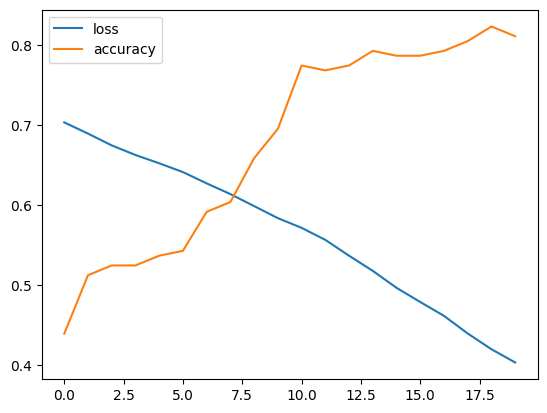

In [162]:
pd.DataFrame(history.history).plot()